In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
import os
import glob

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', None)

np.random.seed(0)

In [3]:
data_dir = Path('./Data_Files')

In [4]:
# Params
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [5]:
df1 = pd.read_csv(data_dir / "+60degrees.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df2 = pd.read_csv(data_dir / "0degrees.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df3 = pd.read_csv(data_dir / "16cm_away.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df4 = pd.read_csv(data_dir / "180.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df5 = pd.read_csv(data_dir / "32cm_away.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df6 = pd.read_csv(data_dir / "80cm_away.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df7 = pd.read_csv(data_dir / "air.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df8 = pd.read_csv(data_dir / "minus_60degrees.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df9 = pd.read_csv(data_dir / "no_air_.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df10 = pd.read_csv(data_dir / "vent_air.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df11 = pd.read_csv(data_dir / "very_close_to_vent.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)

In [6]:
data_dir2 = Path("./Jun30_data_files/")

In [7]:
# for dir,subdir,files in os.walk(data_dir2):
#     for i in files:
#         print (i)
#         if i=="test2.txt" and i == "TEST2.TXT.sb-5b453c2d-NvFVlZ":
#             continue
#         dataframe = pd.read_csv(data_dir2 / i, low_memory=False, names= ['frequency','amplitude'] , index_col = False)
#         dataframe = dataframe[dataframe['frequency'] != "clocktime"]
#         print(dataframe)
#         dataframe = dataframe.dropna()
#         #dataframe = dataframe[:129]
#         #print(dataframe[:129*7])
#         df12 = df12.append(dataframe)

In [8]:
df12 = pd.read_csv(data_dir2 / "Dist1_4.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df12 = df12[df12['frequency'] != "clocktime"]


df13 = pd.read_csv(data_dir2 / "Dist1_6.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df13 = df13[df13['frequency'] != "clocktime"]


df14 = pd.read_csv(data_dir2 / "Dist1_8.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df14 = df14[df14['frequency'] != "clocktime"]


df15 = pd.read_csv(data_dir2 / "Dist1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df15 = df15[df15['frequency'] != "clocktime"]
df15 = df15[:129*2]

df16 = pd.read_csv(data_dir2 / "Dist2.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df16 = df16[df16['frequency'] != "clocktime"]

df17 = pd.read_csv(data_dir2 / "Dist1_2.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df17 = df17[df17['frequency'] != "clocktime"]

df18 = pd.read_csv(data_dir2 / "Dist0_5.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df18 = df18[df18['frequency'] != "clocktime"]

df19 = pd.read_csv(data_dir2 / "Dist0_3.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df19 = df19[df19['frequency'] != "clocktime"]


In [9]:
df19[:129]

,frequency,amplitude
0,0.00,62997.4405
1,62.50,27144.8022
2,125.00,200.6097
3,187.50,174.9460
4,250.00,155.6979
...,...,...
124,3812.50,6.6091
125,3875.00,3.3312
126,3937.50,8.6702
127,4000.00,4.8962


In [10]:
data_dir3 = Path("./July1_data_files/") 

df20 = pd.read_csv(data_dir3 / "Dist10cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df20 = df20[df20['frequency'] != "clocktime"]

df21 = pd.read_csv(data_dir3 / "Dist15cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df21 = df21[df21['frequency'] != "clocktime"]
df21 = df21[:129*4]

df22 = pd.read_csv(data_dir3 / "Dist20cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df22 = df22[df22['frequency'] != "clocktime"]

df23 = pd.read_csv(data_dir3 / "Dist25cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df23 = df23[df23['frequency'] != "clocktime"]

df24 = pd.read_csv(data_dir3 / "Dist30cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df24 = df24[df24['frequency'] != "clocktime"]


In [11]:
df21[:129*2]

,frequency,amplitude
0,0.00,64181.0745
1,62.50,27679.9321
2,125.00,805.2501
3,187.50,612.9744
4,250.00,54.4231
...,...,...
254,4687.50,2.0852
255,4750.00,4.8306
256,4812.50,6.7667
257,4875.00,4.1614


In [12]:
data_dir4 = Path("./July8/") 

df25 = pd.read_csv(data_dir4 / "check.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df25 = df25[df25['frequency'] != "clocktime"]
df25 = df25.dropna()
df25

,frequency,amplitude
0,0.00,54508.3419
1,62.50,23471.8577
2,125.00,222.4883
3,187.50,65.2300
4,250.00,22.4759
...,...,...
18844,7750.00,34.0706
18845,7812.50,72.1740
18846,7875.00,45.6315
18847,7937.50,12.6362


In [13]:
data_dir5 = Path("./19July/") 

df26 = pd.read_csv(data_dir5 / "check.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df26 = df26[df26['frequency'] != "clocktime"]
df26 = df26.dropna()


df27 = pd.read_csv(data_dir5 / "desk.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df27 = df27[df27['frequency'] != "clocktime"]
df27 = df27.dropna()

df28 = pd.read_csv(data_dir5 / "desk2.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df28 = df28[df28['frequency'] != "clocktime"]
df28 = df28.dropna()




In [14]:
df26 = df26[:129*145]

In [15]:
df28 = df28[:129*180]

In [16]:
data_dir6 = Path("./new_files_july23/") 

df29 = pd.read_csv(data_dir6 / "desk.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df29 = df29[df29['frequency'] != "clocktime"]
df29 = df29.dropna()

df30 = pd.read_csv(data_dir6 / "no_air.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df30 = df30[df30['frequency'] != "clocktime"]
df30 = df30.dropna()

df31 = pd.read_csv(data_dir6 / "onvent.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df31 = df31[df31['frequency'] != "clocktime"]
df31 = df31.dropna()

In [17]:
data_dir7 = Path("./final/") 

df32 = pd.read_csv(data_dir7 / "1m_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df32 = df32[df32['frequency'] != "clocktime"]
df32 = df32.dropna()

df33 = pd.read_csv(data_dir7 / "fan_66cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df33 = df33[df33['frequency'] != "clocktime"]
df33 = df33.dropna()


In [18]:

for i in range(147):
    print (len(df32[:129*i])%129)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [19]:
# df = df1.append([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df16, df17, df18, df20, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33])
df = df29.append([df30, df31, df32, df33])

In [20]:
df = df.dropna()
df[:129*800]

,frequency,amplitude
0,0.00,74691.3654
1,62.50,31866.3058
2,125.00,285.2973
3,187.50,330.8644
4,250.00,68.8822
...,...,...
29894,7750.00,41.3127
29895,7812.50,26.5759
29896,7875.00,24.3431
29897,7937.50,1.7325


In [26]:
y1m = df32[df32['frequency'] == "airflow(m/s)"]
y1m = y1m['amplitude']
y1m

128      4.06
258      4.67
388      5.65
518      8.30
648      3.82
         ... 
17288    5.05
17418    5.76
17548    3.44
17678    3.51
17808    4.77
Name: amplitude, Length: 137, dtype: float64

In [27]:
y66cm = df33[df33['frequency'] == "airflow(m/s)"]
y66cm = y66cm['amplitude']
y66cm

128      11.90
258      10.71
388      12.44
518      12.99
648      13.18
         ...  
72798     7.26
72928     9.30
73058     6.65
73188     9.60
73318    10.55
Name: amplitude, Length: 564, dtype: float64

In [28]:
y2_13m = df29[df29['frequency'] == "airflow(m/s)"]
y2_13m = y2_13m['amplitude']
y2_13m

128      3.22
258      3.22
388      3.01
518      3.44
648      3.15
         ... 
18068    3.36
18198    3.44
18328    3.15
18458    3.74
18588    3.51
Name: amplitude, Length: 143, dtype: float64

In [29]:
y_onvent = df31[df31['frequency'] == "airflow(m/s)"]
y_onvent = y_onvent['amplitude']
y_onvent

128      12.99
258      10.71
388       7.90
518      29.09
648      27.47
         ...  
34448    29.76
34578    30.10
34708    28.44
34838    27.15
34968    28.76
Name: amplitude, Length: 269, dtype: float64

In [30]:
y_no_air = df30[df30['frequency'] == "airflow(m/s)"]
y_no_air = y_no_air['amplitude']
y_no_air

128     7.01
258     6.65
388     5.55
518     5.76
648     6.19
778     5.87
908     5.15
1038    4.15
1168    4.86
1298    4.15
1428    3.74
1558    4.86
1688    3.44
1818    3.90
1948    3.90
2078    3.36
2208    3.44
2338    3.44
2468    2.82
2598    3.08
2728    2.82
Name: amplitude, dtype: float64

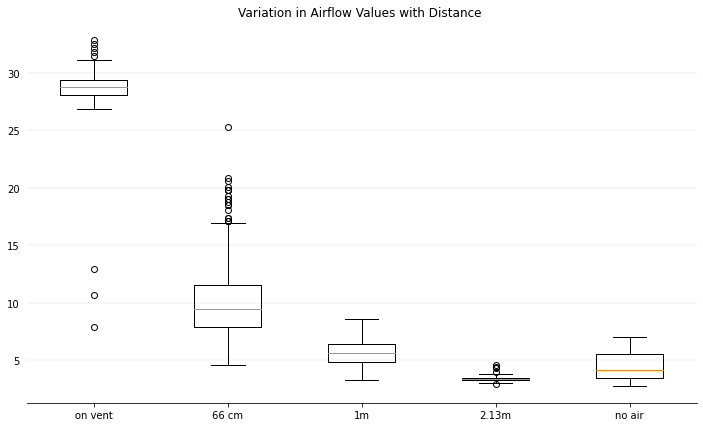

In [40]:

# Visualize petal length distribution for all species
fig, ax = plt.subplots(figsize=(12, 7))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Variation in Airflow Values with Distance ')
# Set species names as labels for the boxplot
dataset = [y_onvent, y66cm, y1m, y2_13m, y_no_air]
labels = ['on vent', '66 cm', '1m', '2.13m', 'no air']
ax.boxplot(dataset, labels=labels)
plt.savefig("airflow_ranges")
plt.show()


In [38]:
for i in dataset:
    print (len(i))

269
564
137
143
21
